In [63]:
import tensorflow as tf
import numpy as np

In [64]:
from tensorflow.keras.layers import Dense

In [65]:
layer_ = Dense(10, activation = "gelu")

In [66]:
layer_(np.random.randn(1, 10))  ### this guy behaves like a function, this is just a layer

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
number([[-0.1633137 ,  0.25553417, -0.05988504, -0.06520779,  0.04899485,
         0.06591041, -0.16849676,  0.46788764,  0.42572072, -0.04778216]],
      dtype=float32)>

In [67]:
#### How do you get couple of layer sequentially?
from tensorflow.keras import Sequential

In [86]:
network = Sequential([Dense(20),
                     Dense(20, activation ="gelu"), 
                     Dense(1500, activation = "selu"),
                      Dense(1500, activation = "selu"),
                      Dense(1500, activation = "selu"),
                      Dense(1500, activation = "selu"),
                      Dense(1500, activation = "selu"),
                      Dense(1500, activation = "selu"),
                      Dense(1, activation = "selu"),
                  
                     ])

In [90]:
network.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 20)                420       
                                                                 
 dense_57 (Dense)            (None, 20)                420       
                                                                 
 dense_58 (Dense)            (None, 1500)              31500     
                                                                 
 dense_59 (Dense)            (None, 1500)              2251500   
                                                                 
 dense_60 (Dense)            (None, 1500)              2251500   
                                                                 
 dense_61 (Dense)            (None, 1500)              2251500   
                                                                 
 dense_62 (Dense)            (None, 1500)            

In [87]:
X = np.random.randn(1000, 20)
y = np.random.randn(1000,1)  ### created here some artificial data
### we have 20 variables, 1000 samples


In [88]:
network.compile(optimizer = "ADAM", loss= "mse", )

In [89]:
network.fit(X,y, batch_size = 64, epochs = 100)  
### Good practice is to pick the batch size as a power of 2
###  Here we have used gradient descent algorithm
### some notions 
### Batch_size = little piece that make of the data 1000//64 == number of batches
### Epoch = once all the dataset  is passed, this means we trained the model for one epoch!!!!!

Epoch 1/100
16/16 [==============================] - 2s 59ms/step - loss: 4.8334
Epoch 2/100
16/16 [==============================] - 1s 60ms/step - loss: 10.1347
Epoch 3/100
16/16 [==============================] - 1s 59ms/step - loss: 4.0994
Epoch 4/100
16/16 [==============================] - 1s 59ms/step - loss: 4.0994
Epoch 5/100
16/16 [==============================] - 1s 60ms/step - loss: 4.0994
Epoch 6/100
16/16 [==============================] - 1s 59ms/step - loss: 4.0994
Epoch 7/100
16/16 [==============================] - 1s 60ms/step - loss: 4.0994
Epoch 8/100
16/16 [==============================] - 1s 59ms/step - loss: 4.0994
Epoch 9/100
16/16 [==============================] - 1s 60ms/step - loss: 4.0994
Epoch 10/100
16/16 [==============================] - 1s 59ms/step - loss: 4.0994
Epoch 11/100
16/16 [==============================] - 1s 60ms/step - loss: 4.0994
Epoch 12/100
16/16 [==============================] - 1s 60ms/step - loss: 4.0994
Epoch 13/100
16/16 [====

KeyboardInterrupt: 

In [ ]:
#### A quick recap here is that you should choose your NN first small, if needed make it bigger!!!!!!

In [ ]:
#####  Overfit----> your model memorizes the data and does not generalize
####   Underfit  ----> your model has more capacity but you do not have enough data!!!!!

In [170]:
X_train = np.random.randn(5000, 25)
y_train = np.random.randn(5000,1)  ### created here some artificial data
###
###
X_test = np.random.randn(1000, 25)
y_test = np.random.randn(1000,1)  ### created here some artificial data

In [171]:
NN = Sequential([Dense(20),
                     Dense(5, activation ="gelu"), 
                     Dense(1), 
                     ])

In [172]:
NN.compile(optimizer = "ADAM", loss= "mse")

In [173]:
history = NN.fit(X_train,y_train, batch_size = 64, epochs = 100, validation_data = (X_test, y_test))
#### There is an obvious overfit here!!!!!!!!!!!!


Epoch 1/100
79/79 [==============================] - 1s 2ms/step - loss: 1.4934 - val_loss: 1.1476
Epoch 2/100
79/79 [==============================] - 0s 841us/step - loss: 1.0871 - val_loss: 1.0471
Epoch 3/100
79/79 [==============================] - 0s 822us/step - loss: 1.0404 - val_loss: 1.0242
Epoch 4/100
79/79 [==============================] - 0s 838us/step - loss: 1.0253 - val_loss: 1.0144
Epoch 5/100
79/79 [==============================] - 0s 816us/step - loss: 1.0207 - val_loss: 1.0089
Epoch 6/100
79/79 [==============================] - 0s 850us/step - loss: 1.0171 - val_loss: 1.0088
Epoch 7/100
79/79 [==============================] - 0s 831us/step - loss: 1.0143 - val_loss: 1.0037
Epoch 8/100
79/79 [==============================] - 0s 804us/step - loss: 1.0123 - val_loss: 1.0045
Epoch 9/100
79/79 [==============================] - 0s 890us/step - loss: 1.0142 - val_loss: 1.0041
Epoch 10/100
79/79 [==============================] - 0s 885us/step - loss: 1.0108 - val_loss

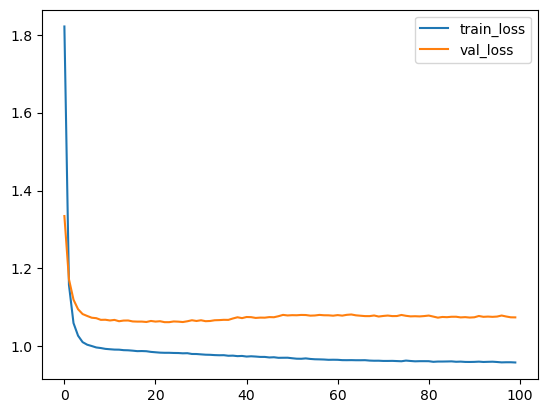

In [117]:
from matplotlib import pyplot as plt
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label ="val_loss")
plt.legend()
plt.show()

In [178]:
from tensorflow.keras import datasets 

In [179]:
from tensorflow.keras.datasets import boston_housing

In [180]:
(X_train,y_train), (X_test, y_test) = boston_housing.load_data()

In [208]:
X_train.shape

(404, 13)

In [199]:
NN = Sequential([Dense(35, "gelu"),
                Dense(20, activation ="gelu"), 
                Dense(20, activation ="gelu"), 
                Dense(1), 
                     ])

In [201]:
NN.compile(optimizer = tf.keras.optimizers.Adam(0.00001), loss= "mae")

In [202]:
history = NN.fit(X_train,y_train, batch_size = 64, epochs = 300, validation_data = (X_test, y_test))
#### There is an obvious overfit here!!!!!!!!!!!!

Epoch 1/300
7/7 [==============================] - 1s 19ms/step - loss: 16.9347 - val_loss: 17.2461
Epoch 2/300
7/7 [==============================] - 0s 4ms/step - loss: 16.7838 - val_loss: 17.1046
Epoch 3/300
7/7 [==============================] - 0s 3ms/step - loss: 16.6350 - val_loss: 16.9649
Epoch 4/300
7/7 [==============================] - 0s 4ms/step - loss: 16.4881 - val_loss: 16.8265
Epoch 5/300
7/7 [==============================] - 0s 4ms/step - loss: 16.3403 - val_loss: 16.6891
Epoch 6/300
7/7 [==============================] - 0s 4ms/step - loss: 16.1919 - val_loss: 16.5521
Epoch 7/300
7/7 [==============================] - 0s 4ms/step - loss: 16.0475 - val_loss: 16.4178
Epoch 8/300
7/7 [==============================] - 0s 4ms/step - loss: 15.9017 - val_loss: 16.2913
Epoch 9/300
7/7 [==============================] - 0s 4ms/step - loss: 15.7600 - val_loss: 16.1663
Epoch 10/300
7/7 [==============================] - 0s 4ms/step - loss: 15.6188 - val_loss: 16.0435
Epoch 11

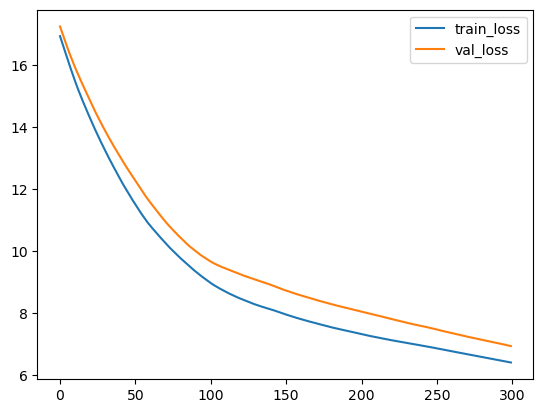

In [203]:
from matplotlib import pyplot as plt
plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label ="val_loss")
plt.legend()
plt.show()

In [204]:
###R^2 is best way to measure how good your model explains the variance of your fitted model (This is for regression, 
### not classification)
import sklearn
from sklearn.metrics import r2_score

In [205]:
y_pred = NN.predict(X_test)
r2_score(y_test, y_pred)

4/4 [==============================] - 0s 813us/step


-0.12359940765527933